In [342]:
#Import necessary libraries
%matplotlib inline
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [343]:
#Import Online Retail Data containing transactions from 01/12/2010 and 09/12/2011
Rtl_data = pd.read_csv('OnlineRetail.csv', encoding = 'unicode_escape')
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [344]:
#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape

(541909, 8)

In [345]:
#Customer distribution by country
country_cust_data=Rtl_data[['Country','CustomerID']].drop_duplicates()
country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [196]:
#Keep only United Kingdom data
# Rtl_data = Rtl_data.query("Country=='United Kingdom'").reset_index(drop=True)

In [346]:
#Check for missing values in the dataset
Rtl_data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [347]:

#Remove missing values from CustomerID column, can ignore missing values in description column
Rtl_data = Rtl_data[pd.notnull(Rtl_data['CustomerID'])]

#Validate if there are any negative values in Quantity column
Rtl_data.Quantity.min()

-80995

In [314]:
#Validate if there are any negative values in UnitPrice column
Rtl_data.UnitPrice.min()

0.0

In [348]:
#Filter out records with negative values
Rtl_data = Rtl_data[(Rtl_data['Quantity']>0)]

In [349]:
#Convert the string date field to datetime
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [350]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['UnitPrice']

In [351]:
#Check the shape (number of columns and rows) in the dataset after data is cleaned
Rtl_data.shape

(397924, 9)

In [352]:
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


## RFM Modelling

In [353]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
RFMScores = Rtl_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [354]:
#Descriptive Statistics (Recency)
RFMScores.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

C:\Users\Vivek Ketha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



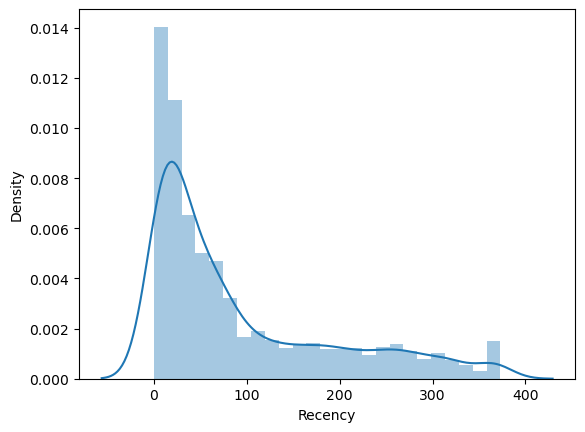

In [355]:
#Recency distribution plot
import seaborn as sns
x = RFMScores['Recency']

ax = sns.distplot(x)

In [356]:
#Descriptive Statistics (Frequency)
RFMScores.Frequency.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

C:\Users\Vivek Ketha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



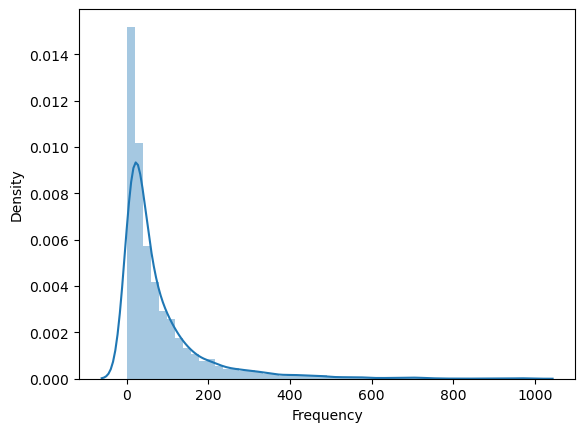

In [357]:
#Frequency distribution plot, taking observations which have frequency less than 1000
import seaborn as sns
x = RFMScores.query('Frequency < 1000')['Frequency']

ax = sns.distplot(x)

In [358]:
#Descriptive Statistics (Monetary)
RFMScores.Monetary.describe()

count      4339.000000
mean       2053.793018
std        8988.248381
min           0.000000
25%         307.245000
50%         674.450000
75%        1661.640000
max      280206.020000
Name: Monetary, dtype: float64

C:\Users\Vivek Ketha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



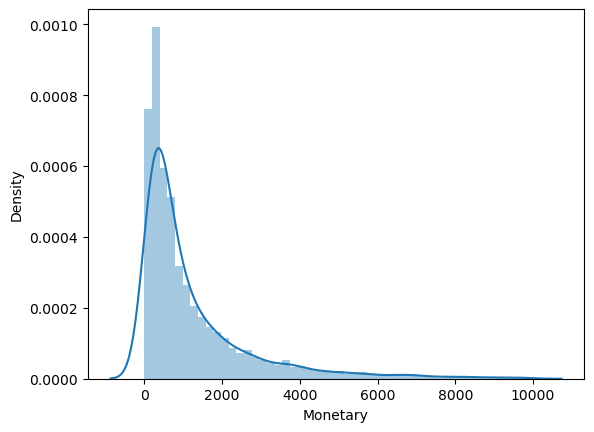

In [359]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
import seaborn as sns
x = RFMScores.query('Monetary < 10000')['Monetary']

ax = sns.distplot(x)

In [360]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [361]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995, 0.5: 674.4499999999998, 0.75: 1661.64}}

In [362]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [363]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [364]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [365]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze


In [366]:
Score_cuts

CustomerID
12346.0      Silver
12347.0    Platinum
12348.0        Gold
12349.0    Platinum
12350.0      Bronze
             ...   
18280.0      Bronze
18281.0      Bronze
18282.0      Silver
18283.0    Platinum
18287.0    Platinum
Name: RFMScore, Length: 4339, dtype: category
Categories (4, object): ['Platinum' < 'Gold' < 'Silver' < 'Bronze']

In [367]:
RFMScores['RFMScore'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10], dtype=int64)

In [368]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='432'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,15332.0,366,35,1661.06,4,3,2,432,9,Silver
1,12967.0,358,19,1660.90,4,3,2,432,9,Silver
2,15057.0,275,25,1489.50,4,3,2,432,9,Silver
3,13572.0,205,33,1384.25,4,3,2,432,9,Silver
4,15813.0,207,40,1303.91,4,3,2,432,9,Silver
5,16766.0,273,34,1145.60,4,3,2,432,9,Silver
6,12769.0,238,32,1143.60,4,3,2,432,9,Silver
7,17770.0,198,38,1143.27,4,3,2,432,9,Silver
8,13819.0,301,36,1140.35,4,3,2,432,9,Silver
9,15777.0,241,21,1047.11,4,3,2,432,9,Silver


In [372]:
RFMScores[RFMScores['RFM_Loyalty_Level']=='Silver']

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver
12363.0,109,23,552.00,3,3,3,333,9,Silver
12365.0,291,22,641.38,4,3,3,433,10,Silver
12367.0,4,11,168.90,1,4,4,144,9,Silver
12390.0,79,32,549.84,3,3,3,333,9,Silver
...,...,...,...,...,...,...,...,...,...
18270.0,38,11,283.15,2,4,4,244,10,Silver
18273.0,2,3,204.00,1,4,4,144,9,Silver
18274.0,30,11,175.92,2,4,4,244,10,Silver


In [369]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)




In [331]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver
12347.0,2,182,4310.00,1,1,1,111,3,Platinum
12348.0,75,31,1797.24,3,3,1,331,7,Gold
12349.0,18,73,1757.55,2,2,1,221,5,Platinum
12350.0,310,17,334.40,4,4,3,443,11,Bronze
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Bronze
18281.0,180,7,80.82,4,4,4,444,12,Bronze
18282.0,7,12,178.05,1,4,4,144,9,Silver


In [338]:
RFMScores=RFMScores.head(1)
RFMScores


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.6,4,4,1,441,9,Silver


## K-Means Clustering

In [339]:
# #Handle negative and zero values so as to handle infinite numbers during log transformation
# def handle_neg_n_zero(num):
#     if num <= 0:
#         return 1
#     else:
#         return num
# #Apply handle_neg_n_zero function to Recency and Monetary columns 
# RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
# RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

In [340]:
Log_Tfd_Data


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.0,11.254


In [183]:
Log_Tfd_Data=Log_Tfd_Data.head(1)
Log_Tfd_Data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.0,11.254


In [184]:
# #Data distribution after data normalization for Recency
# Recency_Plot = Log_Tfd_Data['Recency']
# ax = sns.distplot(Recency_Plot)

In [185]:
# #Data distribution after data normalization for Frequency
# Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
# ax = sns.distplot(Frequency_Plot)

In [186]:
# #Data distribution after data normalization for Monetary
# Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
# ax = sns.distplot(Monetary_Plot)

In [225]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)
Scaled_Data
#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

In [188]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
# Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

In [278]:
Scaled_Data=Log_Tfd_Data

In [279]:
Scaled_Data


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784,0.000,11.254
12347.0,0.693,5.204,8.369
12348.0,4.317,3.434,7.494
12349.0,2.890,4.290,7.472
12350.0,5.737,2.833,5.812
...,...,...,...
18280.0,5.624,2.303,5.196
18281.0,5.193,1.946,4.392
18282.0,1.946,2.485,5.182


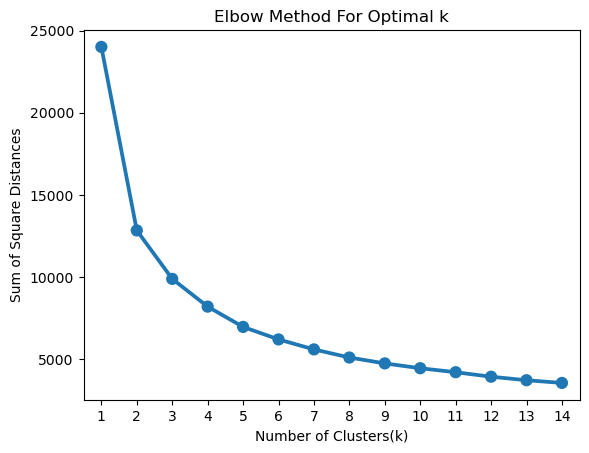

In [280]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [281]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,1
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,1
12350.0,310,17,334.40,4,4,3,443,11,Bronze,2


In [299]:
import joblib
# Save the KMeans model to disk
joblib.dump(KMean_clust, "kmeans_model.joblib")

['kmeans_model.joblib']

In [300]:
# Load the saved model
model = joblib.load('kmeans_model.joblib')
# Predict the output for new data
new_data = pd.DataFrame({"Recency": [5.784],
                         "Frequency": [0.000],
                         "Monetary": [11.254]})
prediction = model.predict(new_data)
prediction[0]

1

In [246]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data (assuming you have some data stored in the variable X)
scaler.fit(Scaled_Data)

# Define the value you want to scale
value = [325,1,77183.60]

# Scale the value
scaled_value = scaler.transform([value])

# Use the scaled value for prediction (assuming you have a model stored in the variable model)
prediction = KMean_clust.predict(scaled_value)

print("Scaled value:", scaled_value)
print("Prediction:", prediction)

Scaled value: [[ 2.17900759e+02 -2.01922428e+00  6.10303750e+04]]
Prediction: [1]


C:\Users\Vivek Ketha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

C:\Users\Vivek Ketha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



In [284]:
# Predict the output for new data
new_data = pd.DataFrame({"Recency": [5.784],
                         "Frequency": [0.000],
                         "Monetary": [11.254]})
prediction = KMean_clust.predict(new_data)
prediction[0]

1

In [ ]:
RFMScores

<Figure size 700x700 with 0 Axes>

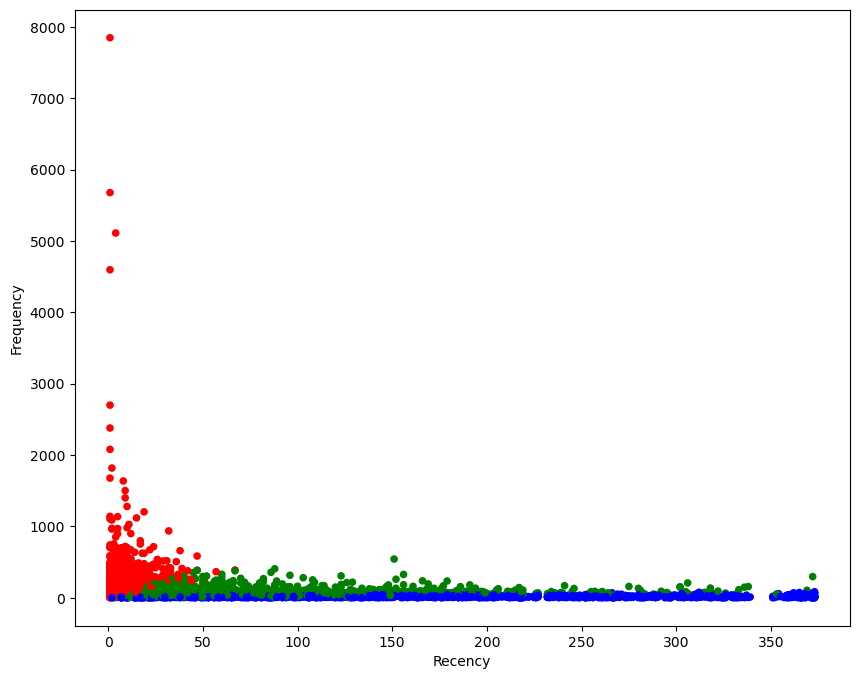

In [293]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)


In [294]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,1,green
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0,red
12348.0,75,31,1797.24,3,3,1,331,7,Gold,1,green
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,1,green
12350.0,310,17,334.40,4,4,3,443,11,Bronze,2,blue


In [295]:
RFMScores.to_csv("RFMScores.csv")

In [296]:
selected_values = RFMScores[RFMScores['Cluster'] == 2]
selected_values

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12350.0,310,17,334.40,4,4,3,443,11,Bronze,2,blue
12353.0,204,4,89.00,4,4,4,444,12,Bronze,2,blue
12355.0,214,13,459.40,4,4,3,443,11,Bronze,2,blue
12361.0,287,10,189.90,4,4,4,444,12,Bronze,2,blue
12363.0,109,23,552.00,3,3,3,333,9,Silver,2,blue
...,...,...,...,...,...,...,...,...,...,...,...
18277.0,58,8,110.38,3,4,4,344,11,Bronze,2,blue
18278.0,73,9,173.90,3,4,4,344,11,Bronze,2,blue
18280.0,277,10,180.60,4,4,4,444,12,Bronze,2,blue


In [289]:
selected_values

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0
12357.0,33,131,6207.67,2,1,1,211,4,Platinum,0
12358.0,1,19,1168.06,1,3,2,132,6,Gold,0
12362.0,3,266,5226.23,1,1,1,111,3,Platinum,0
12364.0,7,85,1313.10,1,2,2,122,5,Platinum,0
...,...,...,...,...,...,...,...,...,...,...
18237.0,2,61,987.10,1,2,2,122,5,Platinum,0
18241.0,9,104,2073.09,1,1,1,111,3,Platinum,0
18245.0,7,175,2567.06,1,1,1,111,3,Platinum,0
